In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [5]:
# set the filepath and load in a shapefile
listings_details = pd.read_csv(r"C:\Users\33788\Desktop\projet_airbnb\source\listings (1).csv", sep = ',')
listings = pd.read_csv(r'C:\Users\33788\Desktop\projet_airbnb\source\listings.csv', sep = ',')
#map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
listings.head()

id                        listing_url       scrape_id last_scraped  \
0  3109  https://www.airbnb.com/rooms/3109  20190709213457   2019-07-10   
1  5396  https://www.airbnb.com/rooms/5396  20190709213457   2019-07-11   
2  7397  https://www.airbnb.com/rooms/7397  20190709213457   2019-07-10   
3  7964  https://www.airbnb.com/rooms/7964  20190709213457   2019-07-10   
4  8522  https://www.airbnb.com/rooms/8522  20190709213457   2019-07-11   

                                name  \
0                       zen and calm   
1     Explore the heart of old Paris   
2   MARAIS - 2ROOMS APT - 2/4 PEOPLE   
3  Large & sunny flat with balcony !   
4            GREAT FLAT w/ CITY VIEW   

                                             summary  \
0  Appartement très calme de 50M2 Utilisation de ...   
1  Cozy, well-appointed and graciously designed s...   
2          VERY CONVENIENT, WITH THE BEST LOCATION !   
3  Very large & nice apartment all for you!  - Su...   
4                                                NaN   

                                               space  \
0                   I bedroom appartment in Paris 14   
1  Small, well appointed studio apartment at the ...   
2  PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...   
3  hello ! We have a great 75 square meter apartm...   
4  Really nice flat located in the 20th district ...   

                                         description experiences_offered  \
0  I bedroom appartment in Paris 14 Good restaura...                none   
1  Cozy, well-appointed and graciously designed s...                none   
2  VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...                none   
3  Very large & nice apartment all for you!  - Su...                none   
4  Really nice flat located in the 20th district ...                none   

                               neighborhood_overview  ... instant_bookable  \
0  Good restaurants very close the Montparnasse S...  ...                f   
1  You are within walking distance to the Louvre,...  ...                t   
2                                                NaN  ...                f   
3                                                NaN  ...                f   
4                                                NaN  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f                     flexible   
1                        f  strict_14_with_grace_period   
2                        f                     moderate   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                               1   
1                               1   
2                               1   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0          

In [6]:
listings_details.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
target_columns = ["name", "host_id","host_name", "neighbourhood_group", "neighbourhood", "latitude", "longitude","room_type", "price", "minimum_nights", "number_of_reviews", "last_review","reviews_per_mont", "calculated_host_listings_count", "availability_365"]
#listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64293 entries, 0 to 64292
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 52.0+ MB


In [11]:
from PIL import *
Image
print(Image.__version__)

5.4.1


In [14]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [15]:
from PIL import Image
#im = Image.open("bride.jpg")
#im.rotate(45).show()

In [16]:
import os

from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw


im1 = Image.open("1.png")
im2 = Image.open("2.png")
im3 = Image.open("3.png")
List_i = []
List_j = []

List_i.append(im1.size[0]) 
List_j.append(im1.size[1]) 
List_i.append(im2.size[0]) 
List_j.append(im2.size[1]) 
List_i.append(im3.size[0]) 
List_j.append(im3.size[1]) 
print('Image Size (i,j) Max', max(List_i), max(List_j))

pad = 4

new_im = Image.new('RGB', (max(List_i)+pad,max(List_j)+pad),(255,255,255))
new_im.paste(im1, (0+pad,0+pad))
new_im.save("1_adjusted.png", "PNG")

new_im = Image.new('RGB', (max(List_i)+pad,max(List_j)+pad),(255,255,255))
new_im.paste(im2, (0+pad,0+pad))
new_im.save("2_adjusted.png", "PNG")

new_im = Image.new('RGB', (max(List_i)+pad,max(List_j)+pad),(255,255,255))
new_im.paste(im3, (0+pad,0+pad))
new_im.save("3_adjusted.png", "PNG")
# Finally convert images to gif

os.system('convert -delay 100 *_adjusted.png animation.gif')


Image Size (i,j) Max 680 480


4

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set

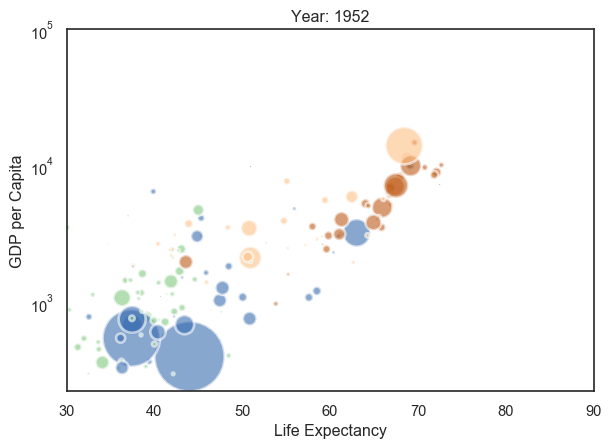

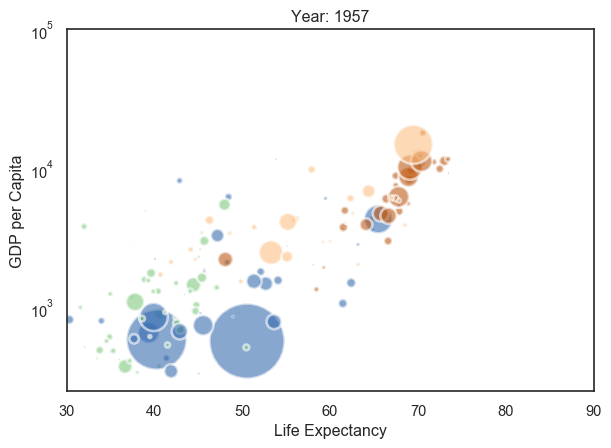

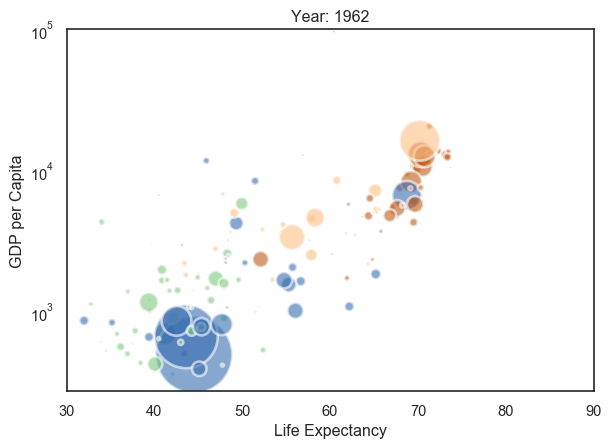

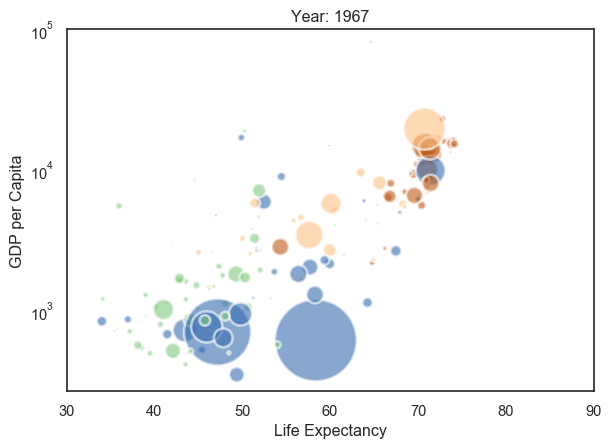

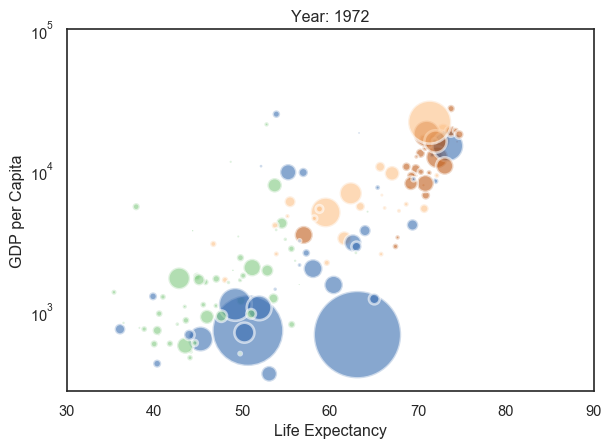

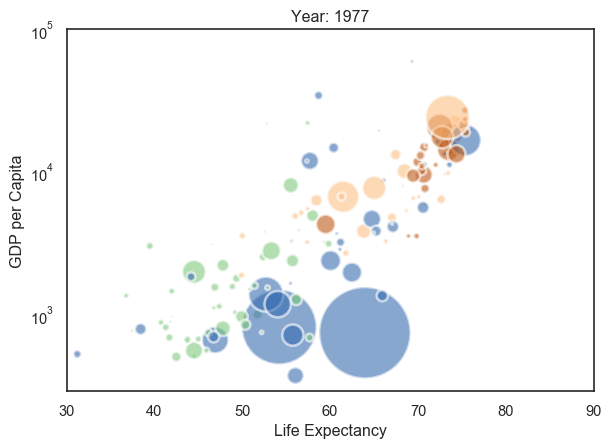

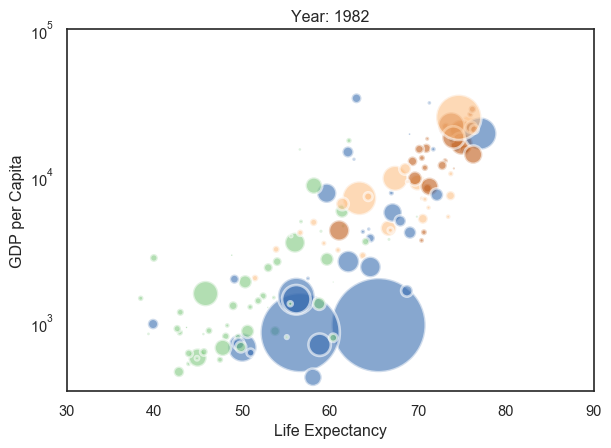

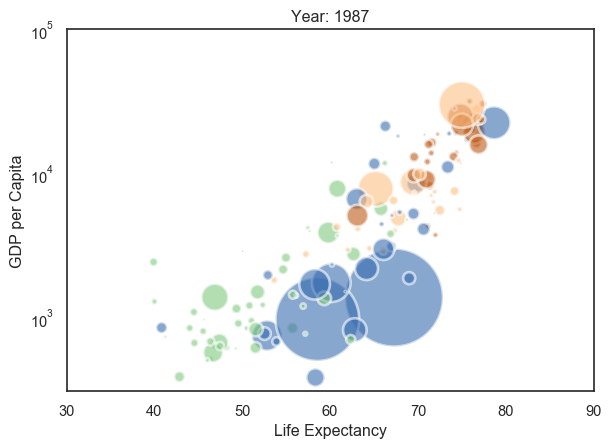

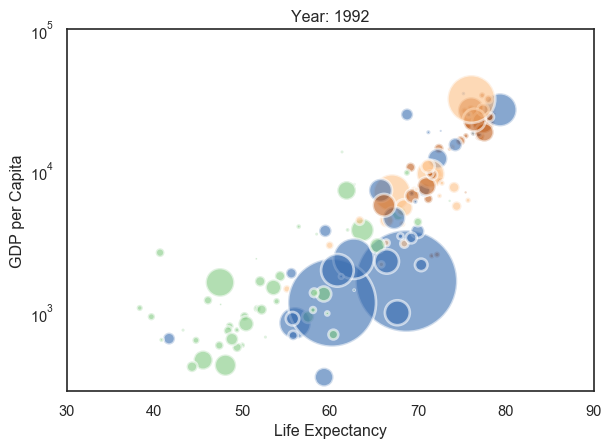

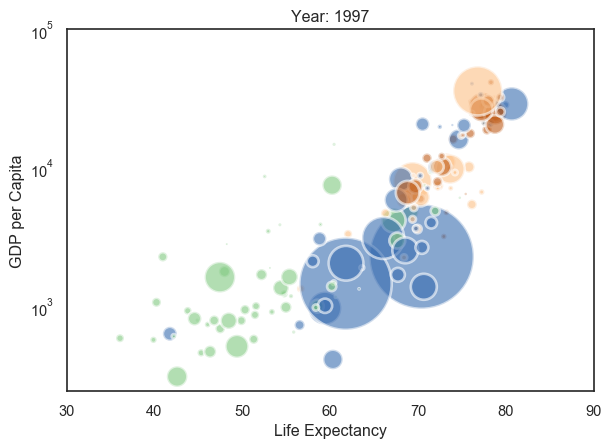

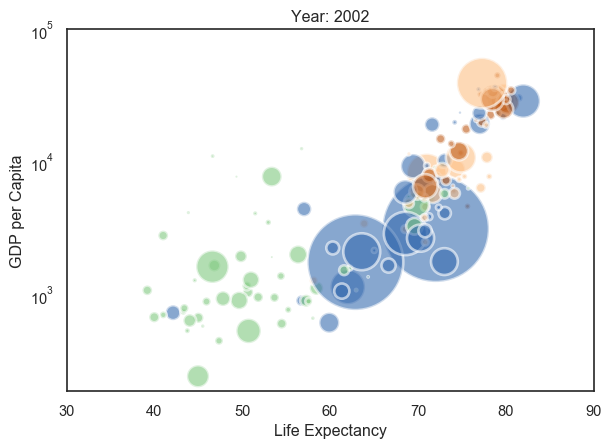

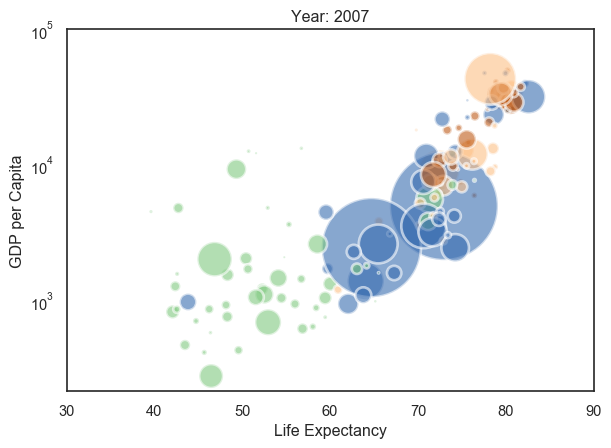

In [18]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96



# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
 
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])


liste=[]
# For each year:
for i in data.year.unique():
 
# initialize a figure
    fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Change color with c and alpha. I map the color to the X axis value.
    tmp=data[ data.year == i ]
    plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
 
# Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,100000)
    plt.xlim(30, 90)
 
# Save it
    filename='Gapminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    
liste.append('Gapminder_step'+str(i)+'.png')

    #liste.append('Gapminder_step'+str(i)+'.png')
    #print(liste)
    #plt.show()
  

In [19]:
import shutil
import subprocess

result = shutil.which('convert')

if result:
    command = 'bash convert_svg_to_png.sh'.split()
    try:
        result = subprocess.check_call(command)
        print('successful')
    except subprocess.CalledProcessError:
        print('An error occurs')

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

In [20]:
import os  
os.chdir(r'C:\Users\33788\Documents\carte_anim\ball')

from PIL import Image, ImageDraw

 
 
def create_image_with_ball(width, height, ball_x, ball_y, ball_size):
    img = Image.new('RGB', (width, height), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    # draw.ellipse takes a 4-tuple (x0, y0, x1, y1) where (x0, y0) is the top-left bound of the box
    # and (x1, y1) is the lower-right bound of the box.
    draw.ellipse((ball_x, ball_y, ball_x + ball_size, ball_y + ball_size), fill='red')
    #img.save('pil_balle.png')
    return img
    
create_image_with_ball(400,400, 40, 40, 40)    

# Create the frames
frames = []
x, y = 0, 0
for i in range(10):
    new_frame = create_image_with_ball(400, 400, x, y, 40)
    new_frame_title='balle'+str(i)+'.png'
    new_frame.save(new_frame_title)
    frames.append(new_frame)
    x += 40
    y += 40
 
# Save into a GIF file that loops forever
frames[0].save('moving_ball.gif', format='GIF', append_images=frames[1:], save_all=True, duration=100, loop=0)

In [21]:
frames

[<PIL.Image.Image image mode=RGB size=400x400 at 0x230D1BA2B38>,
 <PIL.Image.Image image mode=RGB size=400x400 at 0x230CD0BFD30>,
 <PIL.Image.Image image mode=RGB size=400x400 at 0x230CD0BF5F8>,
 <PIL.Image.Image image mode=RGB size=400x400 at 0x230CD0BF3C8>,
 <PIL.Image.Image image mode=RGB size=400x400 at 0x230CD0BF320>,
 <PIL.Image.Image image mode=RGB size=400x400 at 0x230D1ADB048>,
 <PIL.Image.Image image mode=RGB size=400x400 at 0x230C5388240>,
 <PIL.Image.Image image mode=RGB size=400x400 at 0x230C5388EB8>,
 <PIL.Image.Image image mode=RGB size=400x400 at 0x230C5388EF0>,
 <PIL.Image.Image image mode=RGB size=400x400 at 0x230C5388CF8>]

In [22]:
frames[0].save('moving_ball.gif', format='GIF', append_images=frames[1:], save_all=True, duration=100, loop=0)

In [23]:
import os  
os.chdir(r'C:\Users\33788\Documents\carte_anim\ball')

from PIL import Image, ImageDraw

 
 
def create_image_with_ball(width, height, ball_x, ball_y, ball_size):
    img = Image.new('RGB', (width, height), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    # draw.ellipse takes a 4-tuple (x0, y0, x1, y1) where (x0, y0) is the top-left bound of the box
    # and (x1, y1) is the lower-right bound of the box.
    draw.ellipse((ball_x, ball_y, ball_x + ball_size, ball_y + ball_size), fill='red')
    #img.save('pil_balle.png')
    return img
    
create_image_with_ball(400,400, 40, 40, 40)    

# Create the frames
frames = []
x, y = 0, 0
for i in range(10):
    new_frame = create_image_with_ball(400, 400, x, y, 40)
    new_frame_title='balle'+str(i)+'.png'
    new_frame.save(new_frame_title)
    frames.append(new_frame)
    x += 40
    y += 40
 
# Save into a GIF file that loops forever
frames[0].save('moving_ball.gif', format='GIF', append_images=frames[1:], save_all=True, duration=100, loop=0)

In [24]:
%matplotlib inline

In [25]:
import os
os.chdir(r'C:\Users\33788\Documents\carte_anim\ball')

from PIL import Image, ImageDraw



def create_image_with_ball(width, height, ball_x, ball_y, ball_size):
    img = Image.new('RGB', (width, height), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    # draw.ellipse takes a 4-tuple (x0, y0, x1, y1) where (x0, y0) is the top-left bound of the box
    # and (x1, y1) is the lower-right bound of the box.
    draw.ellipse((ball_x, ball_y, ball_x + ball_size, ball_y + ball_size), fill='red')
    #img.save('pil_balle.png')
    return img

create_image_with_ball(400,400, 40, 40, 40)

# Create the frames
frames = []
x, y = 0, 0
for i in range(10):
    new_frame = create_image_with_ball(400, 400, x, y, 40)
    new_frame_title='balle'+str(i)+'.png'
    new_frame.save(new_frame_title)
    frames.append(new_frame)
    x += 40
    y += 40

# Save into a GIF file that loops forever
frames[0].save('moving_ball.gif', format='GIF', append_images=frames[1:], save_all=True, duration=100, loop=0)

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



['Gapminder_step1952.png']
['Gapminder_step1952.png', 'Gapminder_step1957.png']


C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png']


C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png', 'Gapminder_step1967.png']
['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png', 'Gapminder_step1967.png', 'Gapminder_step1972.png']

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.




['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png', 'Gapminder_step1967.png', 'Gapminder_step1972.png', 'Gapminder_step1977.png']


C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png', 'Gapminder_step1967.png', 'Gapminder_step1972.png', 'Gapminder_step1977.png', 'Gapminder_step1982.png']
['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png', 'Gapminder_step1967.png', 'Gapminder_step1972.png', 'Gapminder_step1977.png', 'Gapminder_step1982.png', 'Gapminder_step1987.png']


C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png', 'Gapminder_step1967.png', 'Gapminder_step1972.png', 'Gapminder_step1977.png', 'Gapminder_step1982.png', 'Gapminder_step1987.png', 'Gapminder_step1992.png']


C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png', 'Gapminder_step1967.png', 'Gapminder_step1972.png', 'Gapminder_step1977.png', 'Gapminder_step1982.png', 'Gapminder_step1987.png', 'Gapminder_step1992.png', 'Gapminder_step1997.png']


C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png', 'Gapminder_step1967.png', 'Gapminder_step1972.png', 'Gapminder_step1977.png', 'Gapminder_step1982.png', 'Gapminder_step1987.png', 'Gapminder_step1992.png', 'Gapminder_step1997.png', 'Gapminder_step2002.png']


C:\Users\33788\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



['Gapminder_step1952.png', 'Gapminder_step1957.png', 'Gapminder_step1962.png', 'Gapminder_step1967.png', 'Gapminder_step1972.png', 'Gapminder_step1977.png', 'Gapminder_step1982.png', 'Gapminder_step1987.png', 'Gapminder_step1992.png', 'Gapminder_step1997.png', 'Gapminder_step2002.png', 'Gapminder_step2007.png']


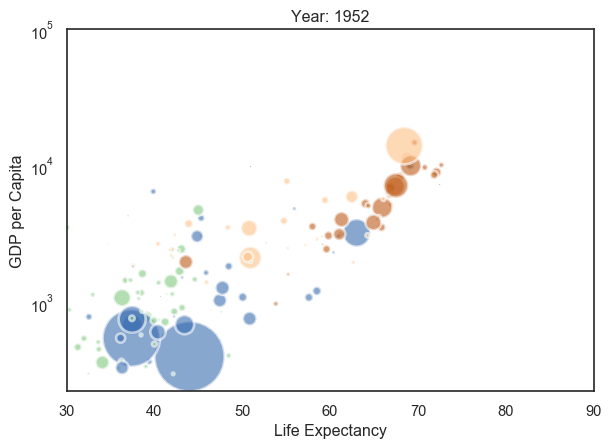

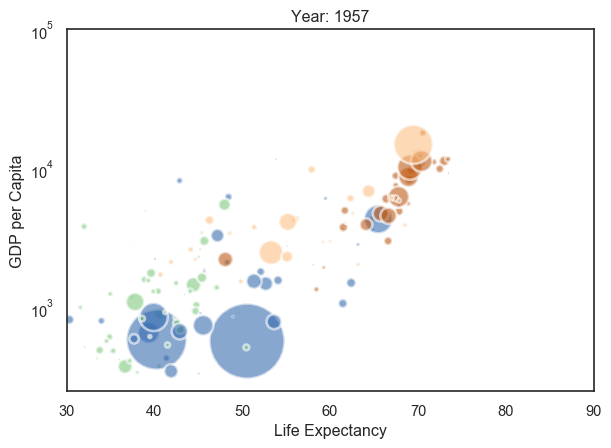

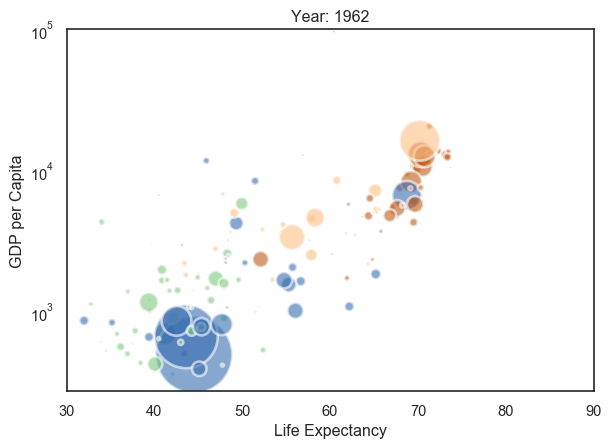

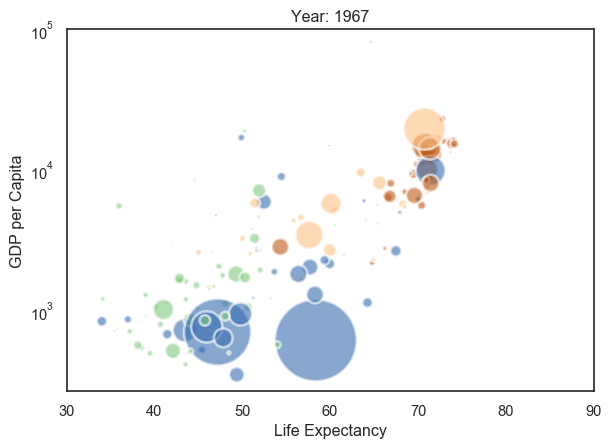

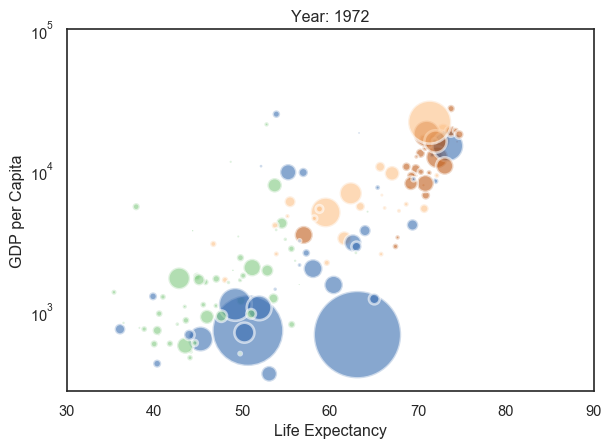

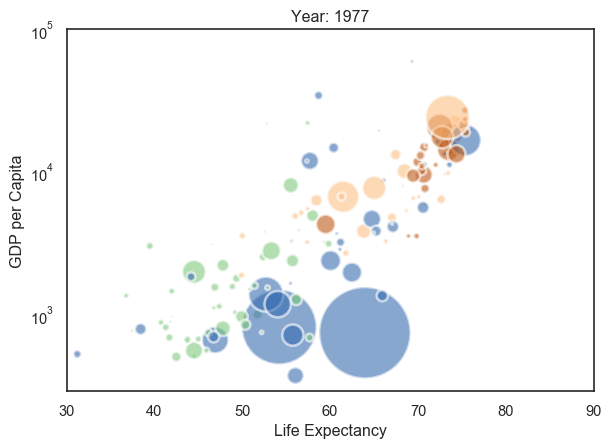

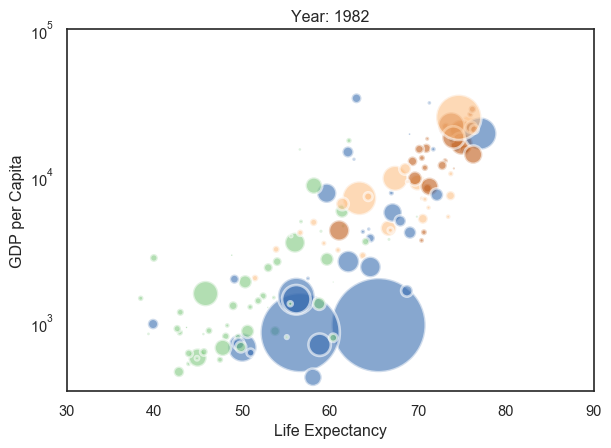

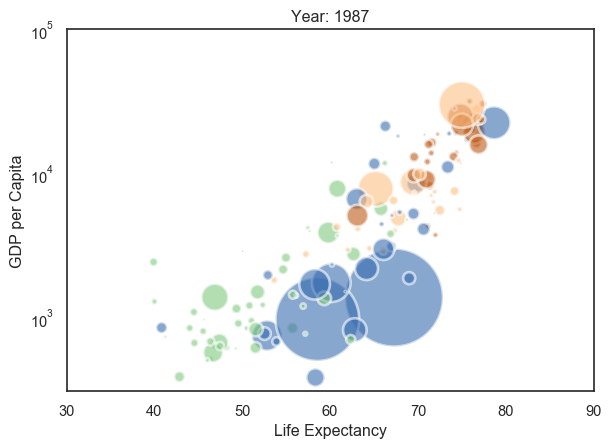

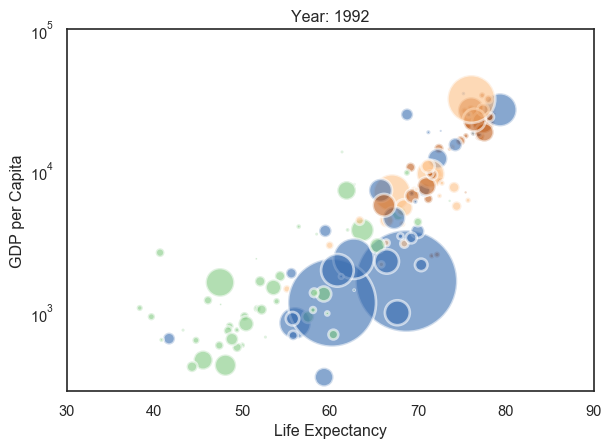

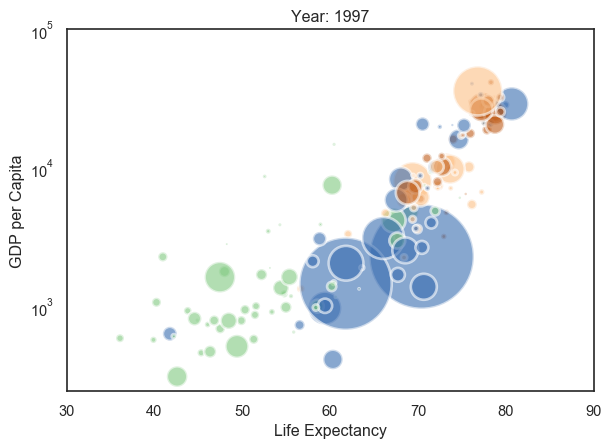

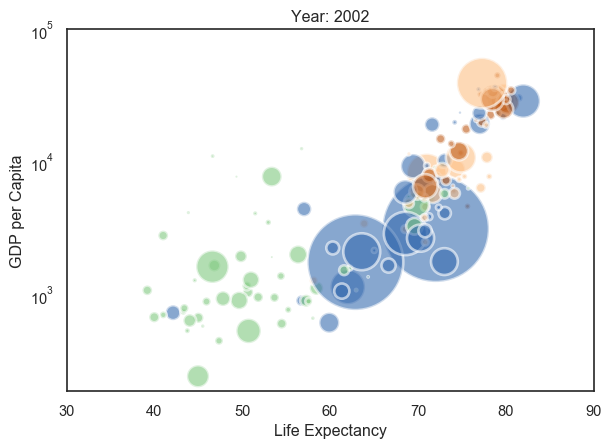

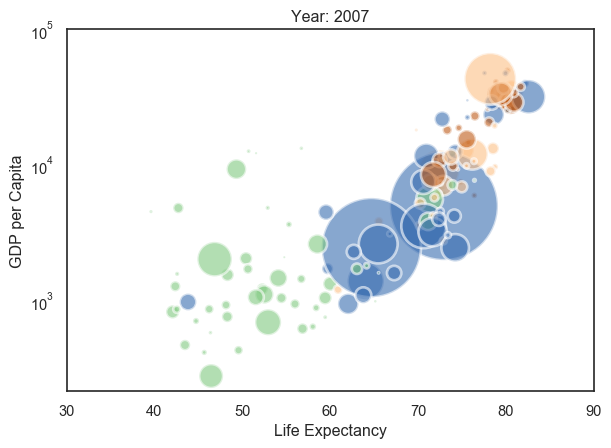

In [27]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96



# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
 
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])


liste=[]
# For each year:
for i in data.year.unique():
 
# initialize a figure
    fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Change color with c and alpha. I map the color to the X axis value.
    tmp=data[ data.year == i ]
    plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
 
# Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,100000)
    plt.xlim(30, 90)
 
# Save it
    filename='Gapminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()


    liste.append('Gapminder_step'+str(i)+'.png')
    print(liste)

In [28]:
import imageio
images = []
for filename in liste:
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images)